preprocessing






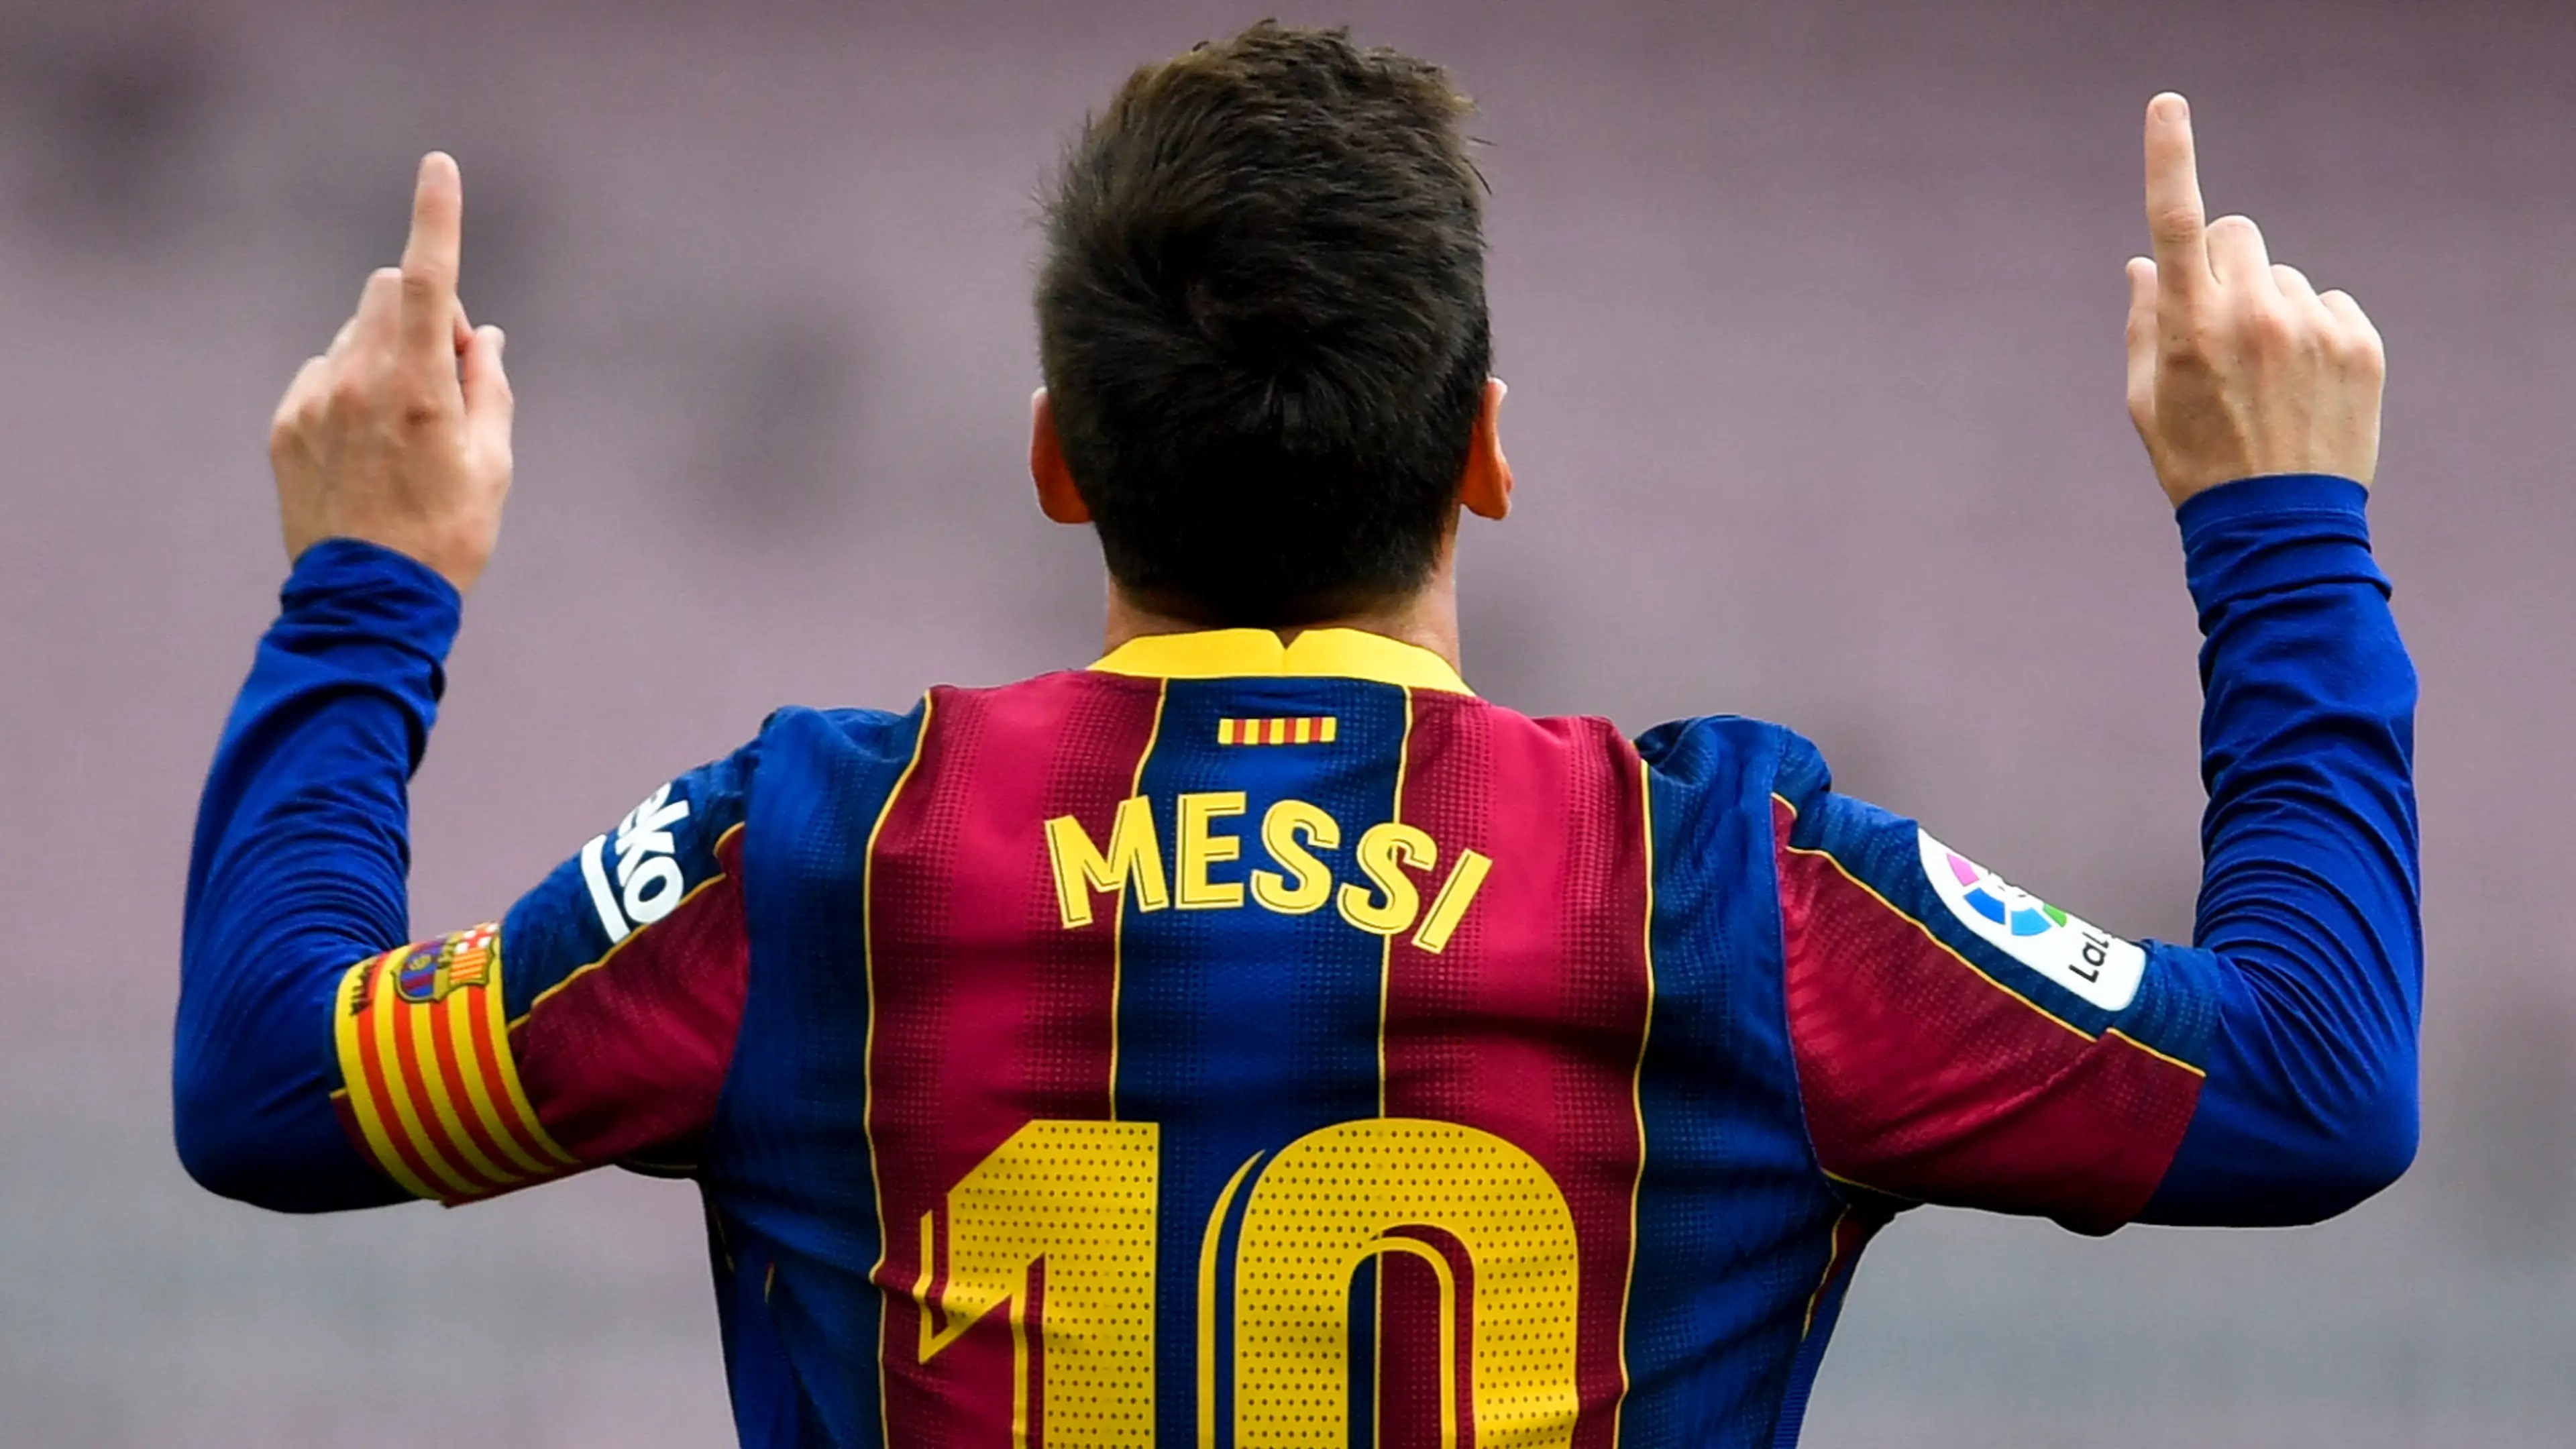

In [428]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

In [429]:
data = pd.read_csv("Lionel Messi Goals.csv")
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,16 - 2 - 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,13 - 1 - 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,22 - 12 - 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,20 - 10 - 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,23 - 9 - 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [430]:
data.isnull().sum()


Date                                     0
Competition Name                       122
Home team                                0
Opponent                                 0
Away team                                0
Minute                                   0
Score Home Team - When Messi Scored      0
Score Away Team - When Messi Scored      0
Goal Type                              311
Goal Method                              0
Final Game Result                        0
dtype: int64

In [431]:
data['Date'] =pd.to_datetime(data['Date'] )
data['Year'] =data['Date'].map(lambda data : data.year)
data.head(7)


C:\Users\khadijeh.valipour\AppData\Local\Temp\ipykernel_10552\2755855375.py:1: UserWarning: Parsing dates in  %d - %m - %Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] =pd.to_datetime(data['Date'] )


,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018
5,2018-08-18,Liga,FC Barcelona,Alaves,Alaves,90+2,3,0,Field goal,Left foot,Won,2018
6,2018-08-18,Liga,FC Barcelona,Alaves,Alaves,64,1,0,Free kick,Left foot,Won,2018


In [432]:
df_GoalType = data['Goal Type'].value_counts().reset_index()
df_GoalType

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


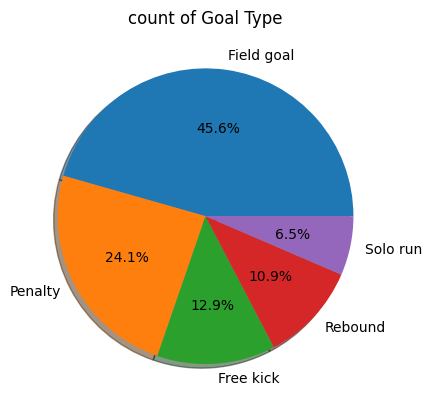

In [433]:
plt.pie(df_GoalType['count'] , labels=df_GoalType['Goal Type'] , shadow=True , autopct='%1.1f%%' )
plt.title("count of Goal Type")
plt.show()

In [434]:
df = data['Goal Method'].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


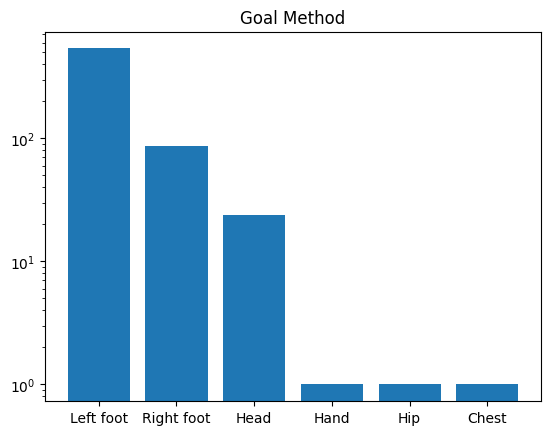

In [435]:

plt.bar(df['Goal Method'] , df['count'] , log=True )
plt.title("Goal Method")
plt.show()

In [436]:
def fix(X) :
    return eval(X)

In [437]:
data['Minute'] = data['Minute'].apply(fix)
#you can replace  
#def fix(X) :
#   return eval(X)
#data['Minute'] = data['Minute'].apply(fix) with :
#data['Minute'] = data['Minute'].apply(eval)
data

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
646,2007-06-17,Liga,Gimnasia fc,Gimnasia fc,FC Barcelona,35,0,2,NaN,Left foot,Won,2007
647,2007-05-20,Liga,Atletico Madrid,Atletico Madrid,FC Barcelona,80,0,5,NaN,Left foot,Won,2007
648,2007-05-20,Liga,Atletico Madrid,Atletico Madrid,FC Barcelona,39,0,1,NaN,Left foot,Won,2007
649,2007-03-17,Liga,Recreativo Huelva,Recreativo Huelva,FC Barcelona,86,0,4,NaN,Left foot,Won,2007


In [438]:
df = data['Minute'].value_counts().reset_index().sort_values(by=['Minute'] , ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


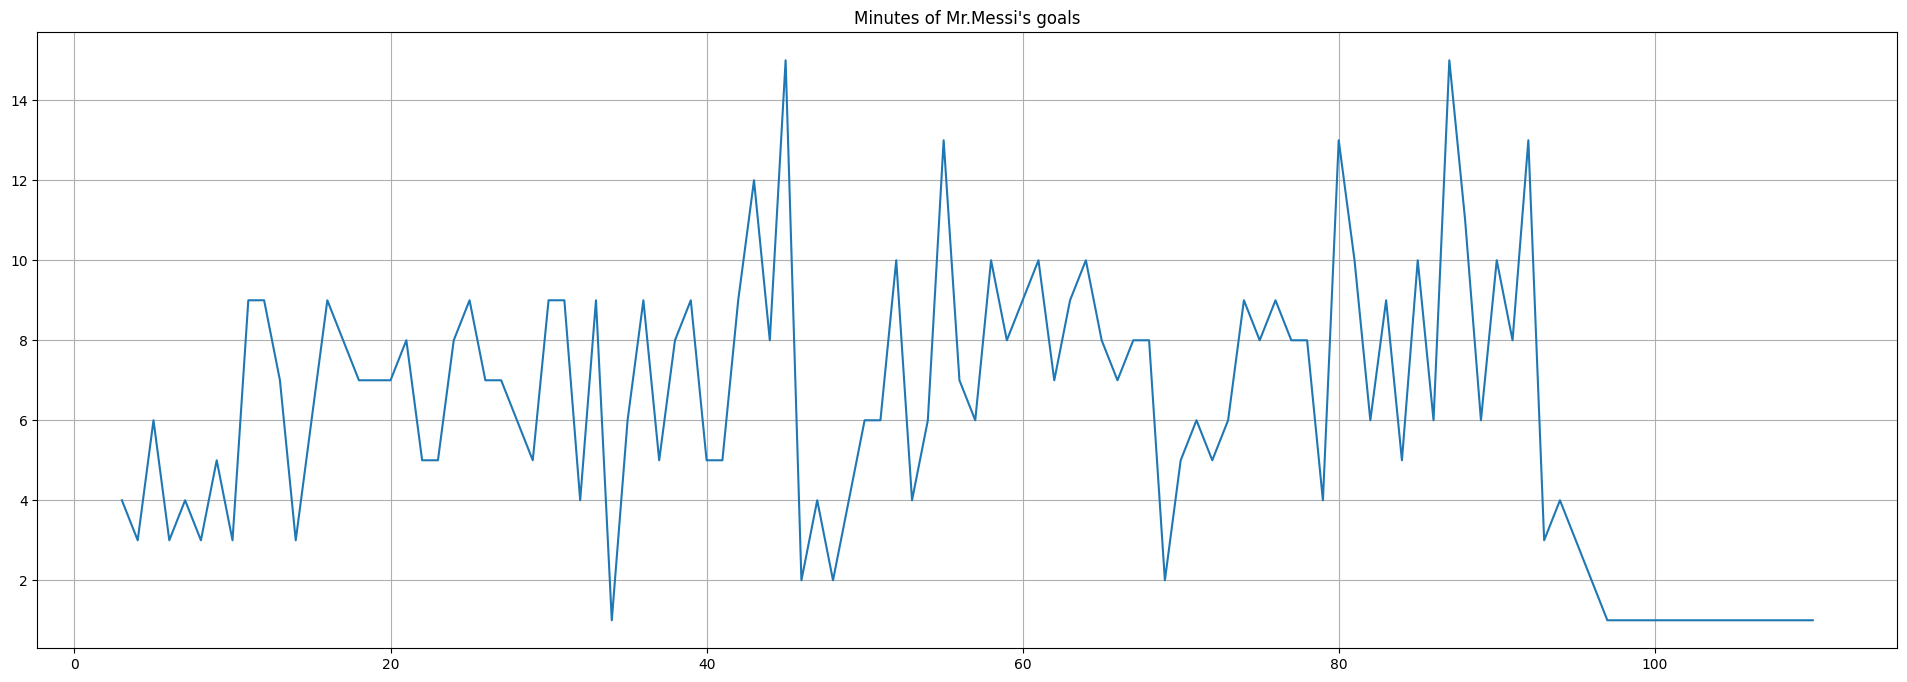

In [439]:
plt.figure(figsize=(24,8))
plt.plot(df['Minute'] , df['count'] )
plt.title("Minutes of Mr.Messi's goals")
plt.grid()
plt.show()

  number of goals lionel messi per year


 

In [440]:
Goal_Year = data['Year'].value_counts().reset_index()
Goal_Year

,Year,count
0,2012,91
1,2010,60
2,2016,59
3,2011,59
4,2014,58
5,2017,54
6,2015,52
7,2018,51
8,2013,45
9,2009,41


In [441]:
Goal_Year = Goal_Year.sort_values(by =['Year'] , ascending=True).reset_index()

Goal_Year

,index,Year,count
0,14,2005,3
1,13,2006,12
2,10,2007,31
3,11,2008,22
4,9,2009,41
5,1,2010,60
6,3,2011,59
7,0,2012,91
8,8,2013,45
9,4,2014,58


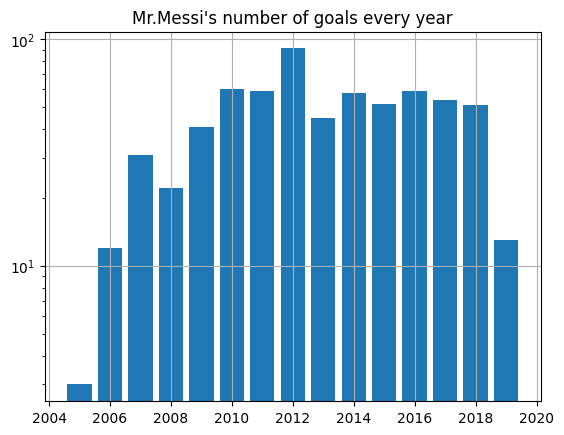

In [442]:
plt.bar(Goal_Year['Year'] , Goal_Year['count'] , log=True)
plt.title("Mr.Messi's number of goals every year")
plt.grid()
plt.show()

Lionel Messi's number of goals with left foot and right foot

In [443]:
Type_Penalty = data.loc[(data['Goal Type'] == 'Penalty')]

Type_Penalty.head(10)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
15,2017-09-19,Liga,FC Barcelona,Eibar,Eibar,20,1,0,Penalty,Left foot,Won,2017
29,2016-01-17,Liga,FC Barcelona,Athletic de Bilbao,Athletic de Bilbao,7,1,0,Penalty,Left foot,Won,2016
35,2015-09-20,Liga,FC Barcelona,Levante,Levante,61,3,0,Penalty,Left foot,Won,2015
37,2015-04-28,Liga,FC Barcelona,Getafe,Getafe,9,1,0,Penalty,Left foot,Won,2015
42,2015-03-08,Liga,FC Barcelona,Rayo Vallecano,Rayo Vallecano,56,3,0,Penalty,Left foot,Won,2015
43,2015-02-15,Liga,FC Barcelona,Levante,Levante,65,4,0,Penalty,Left foot,Won,2015
49,2014-04-05,Liga,FC Barcelona,Real Betis,Real Betis,15,1,0,Penalty,Left foot,Won,2014
56,2013-08-18,Liga,FC Barcelona,Levante,Levante,42,5,0,Penalty,Left foot,Won,2013
62,2013-01-06,Liga,FC Barcelona,Espanyol,Espanyol,29,4,0,Penalty,Left foot,Won,2013


In [444]:
df_LF= Type_Penalty['Goal Method'].value_counts().reset_index()
df_LF

,Goal Method,count
0,Left foot,82


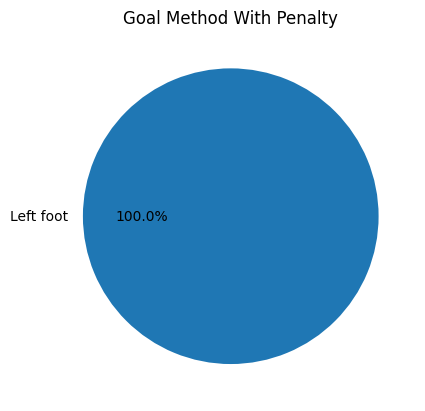

In [445]:
plt.pie(df_LF['count'] , labels=df_LF['Goal Method'], autopct='%1.1f%%')
plt.title("Goal Method With Penalty")
plt.show()

In [446]:
Type_Rebound = data.loc[(data['Goal Type'] == 'Rebound')]

Type_Rebound.head(10)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
19,2017-04-15,Liga,FC Barcelona,Real Sociedad,Real Sociedad,37,2,0,Rebound,Left foot,Won,2017
30,2016-01-09,Liga,FC Barcelona,Granada,Granada,58,3,0,Rebound,Left foot,Won,2016
38,2015-04-18,Liga,FC Barcelona,Valencia,Valencia,94,2,0,Rebound,Left foot,Won,2015
41,2015-03-08,Liga,FC Barcelona,Rayo Vallecano,Rayo Vallecano,63,4,0,Rebound,Left foot,Won,2015
85,2011-02-05,Liga,FC Barcelona,Atletico Madrid,Atletico Madrid,79,3,0,Rebound,Left foot,Won,2011
92,2010-10-30,Liga,FC Barcelona,Sevilla,Sevilla,4,1,0,Rebound,Left foot,Won,2010
117,2006-01-22,Liga,FC Barcelona,Alaves,Alaves,81,2,0,Rebound,Left foot,Won,2006
171,2012-02-19,Liga,FC Barcelona,Valencia,Valencia,76,3,1,Rebound,Left foot,Won,2012
172,2012-02-19,Liga,FC Barcelona,Valencia,Valencia,27,2,1,Rebound,Left foot,Won,2012
183,2007-03-10,Liga,FC Barcelona,Real Madrid,Real Madrid,28,2,2,Rebound,Left foot,Draw,2007


In [447]:
df_LF= Type_Rebound['Goal Method'].value_counts().reset_index()
df_LF

,Goal Method,count
0,Left foot,28
1,Right foot,8
2,Head,1


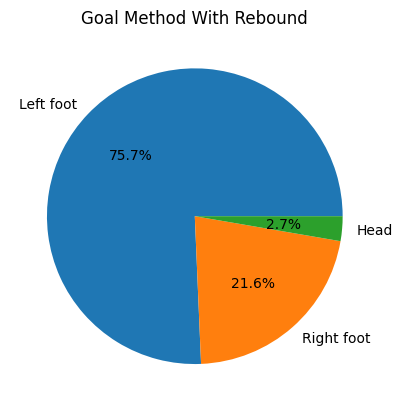

In [448]:
plt.pie(df_LF['count'] , labels=df_LF['Goal Method'], autopct='%1.1f%%')
plt.title("Goal Method With Rebound")
plt.show()

In [449]:
df_LF= data['Goal Method'].value_counts().reset_index()
df_LF

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


In [450]:
Type_non_Penalty = data.loc[(data['Goal Type'] != 'Penalty')]

Type_non_Penalty.head(10)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018
5,2018-08-18,Liga,FC Barcelona,Alaves,Alaves,92,3,0,Field goal,Left foot,Won,2018
6,2018-08-18,Liga,FC Barcelona,Alaves,Alaves,64,1,0,Free kick,Left foot,Won,2018
7,2018-05-09,Liga,FC Barcelona,Villarreal,Villarreal,45,3,0,Field goal,Left foot,Won,2018
8,2018-04-07,Liga,FC Barcelona,Leganes,Leganes,32,2,0,Field goal,Left foot,Won,2018
9,2018-04-07,Liga,FC Barcelona,Leganes,Leganes,27,1,0,Free kick,Left foot,Won,2018
10,2018-03-18,Liga,FC Barcelona,Athletic de Bilbao,Athletic de Bilbao,30,2,0,Field goal,Left foot,Won,2018


In [451]:
count_Type_non_Penalty =Type_non_Penalty['Goal Method'].value_counts().reset_index()
count_Type_non_Penalty

,Goal Method,count
0,Left foot,456
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


Based on the above codes and diagrams, we can see that Mr. Messi did not have a penalty with her right foot

What percentage of games in which Messi has scored in extra time have ended in victory?








In [452]:
won_messi = data.loc[(data['Final Game Result'] == "Won")]
won_messi

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
5,2018-08-18,Liga,FC Barcelona,Alaves,Alaves,92,3,0,Field goal,Left foot,Won,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
646,2007-06-17,Liga,Gimnasia fc,Gimnasia fc,FC Barcelona,35,0,2,NaN,Left foot,Won,2007
647,2007-05-20,Liga,Atletico Madrid,Atletico Madrid,FC Barcelona,80,0,5,NaN,Left foot,Won,2007
648,2007-05-20,Liga,Atletico Madrid,Atletico Madrid,FC Barcelona,39,0,1,NaN,Left foot,Won,2007
649,2007-03-17,Liga,Recreativo Huelva,Recreativo Huelva,FC Barcelona,86,0,4,NaN,Left foot,Won,2007


In [453]:
data2 =pd.read_csv("Lionel Messi Goals.csv")
data2.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,16 - 2 - 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,13 - 1 - 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,22 - 12 - 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,20 - 10 - 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,23 - 9 - 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [454]:
overtime = data2[data2["Minute"].str.len()>2]
#overtime = overtime.loc[overtime['Final Game Result'] == "Won"]
overtime

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
5,18 - 8 - 2018,Liga,FC Barcelona,Alaves,Alaves,90+2,3,0,Field goal,Left foot,Won
34,28 - 11 - 2015,Liga,FC Barcelona,Real Sociedad,Real Sociedad,90+1,4,0,Field goal,Left foot,Won
38,18 - 4 - 2015,Liga,FC Barcelona,Valencia,Valencia,90+4,2,0,Rebound,Left foot,Won
78,24 - 9 - 2011,Liga,FC Barcelona,Atletico Madrid,Atletico Madrid,90+1,5,0,NaN,Left foot,Won
99,16 - 1 - 2010,Liga,FC Barcelona,Sevilla,Sevilla,90+1,4,0,NaN,Left foot,Won
105,13 - 12 - 2008,Liga,FC Barcelona,Real Madrid,Real Madrid,90+1,2,0,NaN,Left foot,Won
123,11 - 11 - 2018,Liga,FC Barcelona,Real Betis,Real Betis,90+2,3,4,Field goal,Left foot,Lost
175,9 - 4 - 2011,Liga,FC Barcelona,UD Almeria,UD Almeria,90+2,3,1,NaN,Left foot,Won
187,20 - 1 - 2019,Liga,FC Barcelona,Leganes,Leganes,90+2,3,1,Field goal,Right foot,Won
190,21 - 5 - 2017,Liga,FC Barcelona,Eibar,Eibar,90+2,4,2,Solo run,Right foot,Won


In [455]:
result = overtime.groupby(overtime['Minute'])['Final Game Result'].value_counts().reset_index()
result

,Minute,Final Game Result,count
0,110,Won,1
1,45+1,Won,1
2,45+3,Won,1
3,90+1,Won,6
4,90+1,Draw,1
5,90+1,Lost,1
6,90+2,Won,12
7,90+2,Lost,1
8,90+3,Won,3
9,90+4,Won,4


In [456]:
result2 = overtime.groupby(overtime['Final Game Result'])['Minute'].count().reset_index()
result2

,Final Game Result,Minute
0,Draw,1
1,Lost,2
2,Won,29


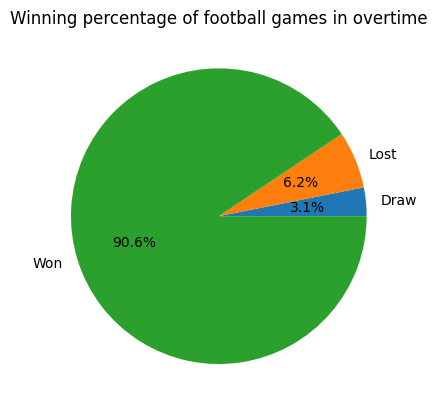

In [457]:
plt.pie( result2['Minute'] , labels=result2['Final Game Result'] , autopct='%.1f%%')
plt.title("Winning percentage of football games in overtime")
plt.show()